In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor


Corrupted data in x:  8
Corrupted data in y:  7
Corrupted data in z:  20
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  

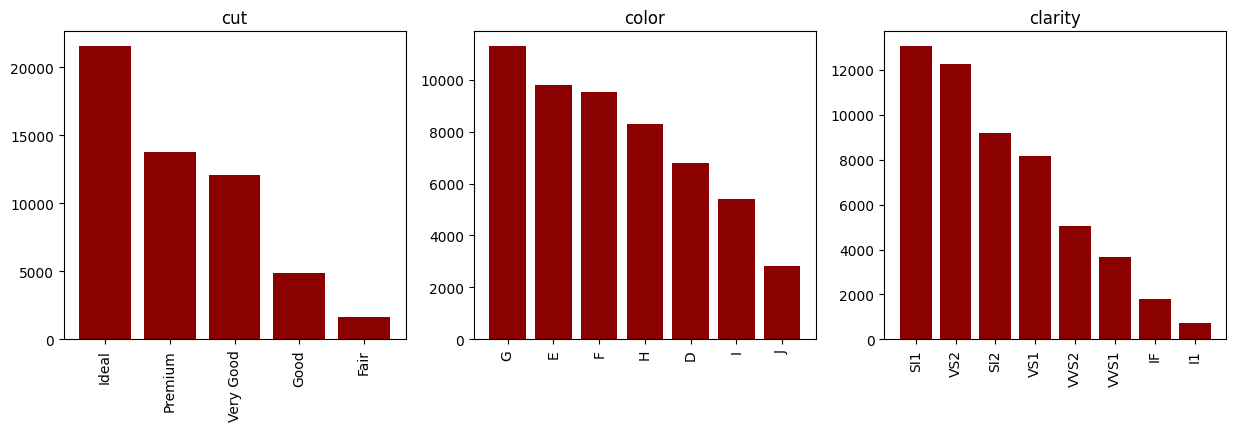

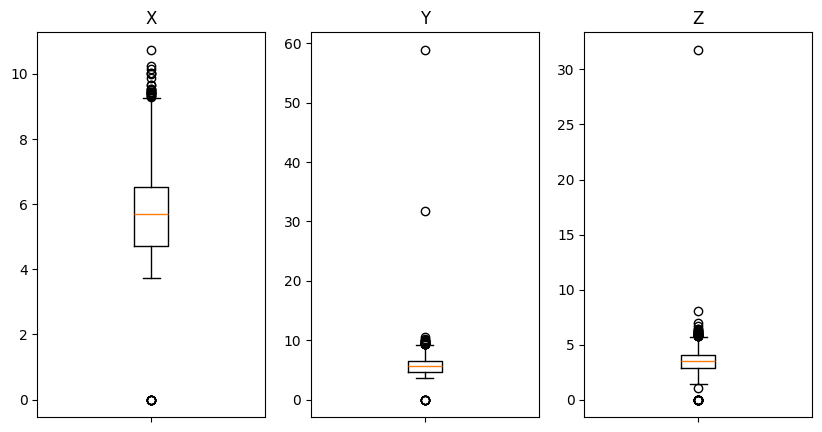

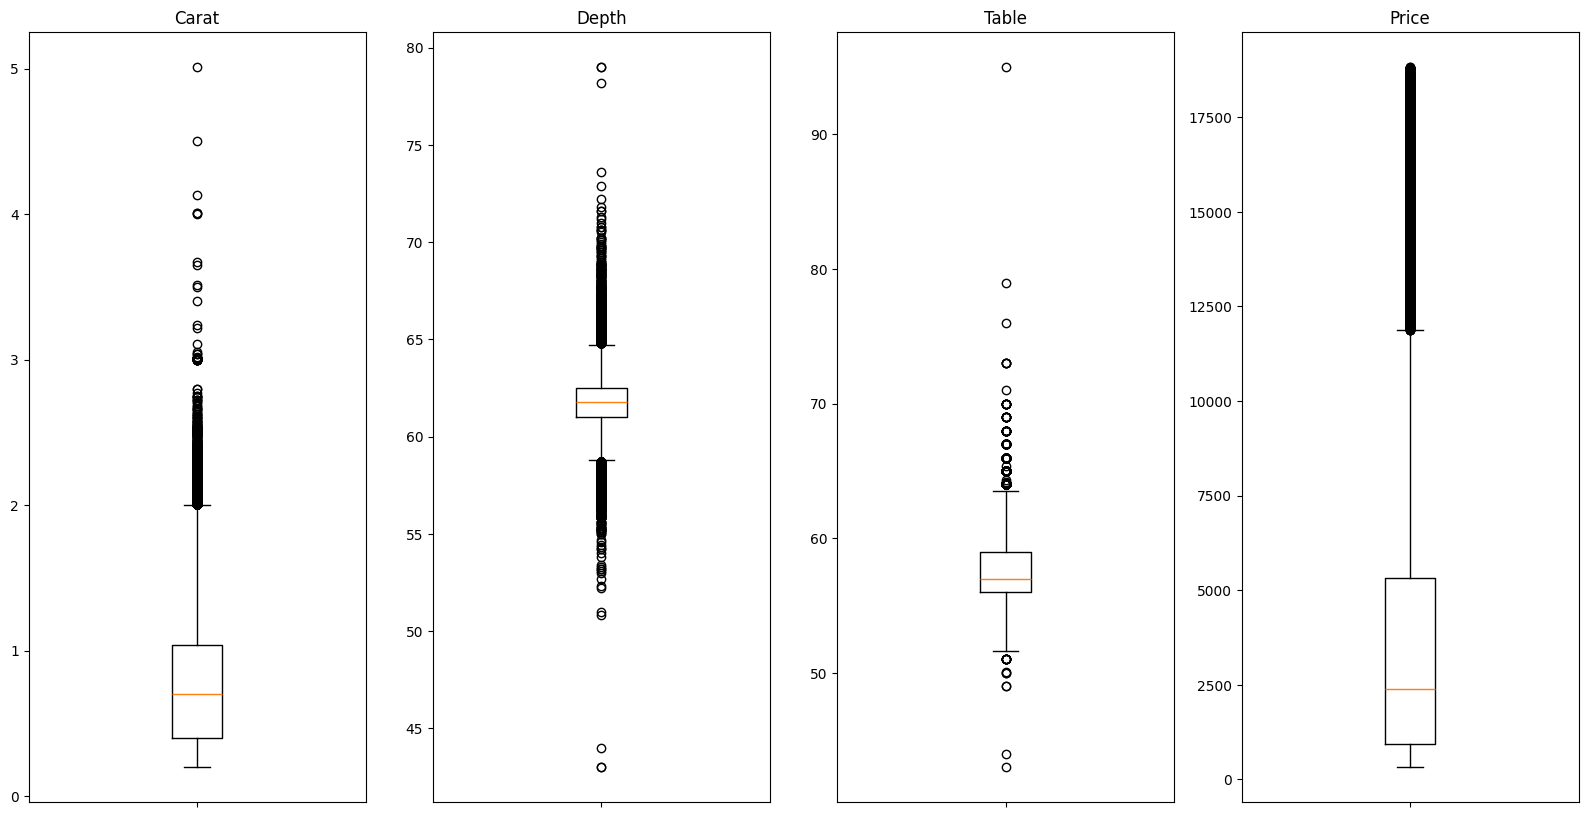

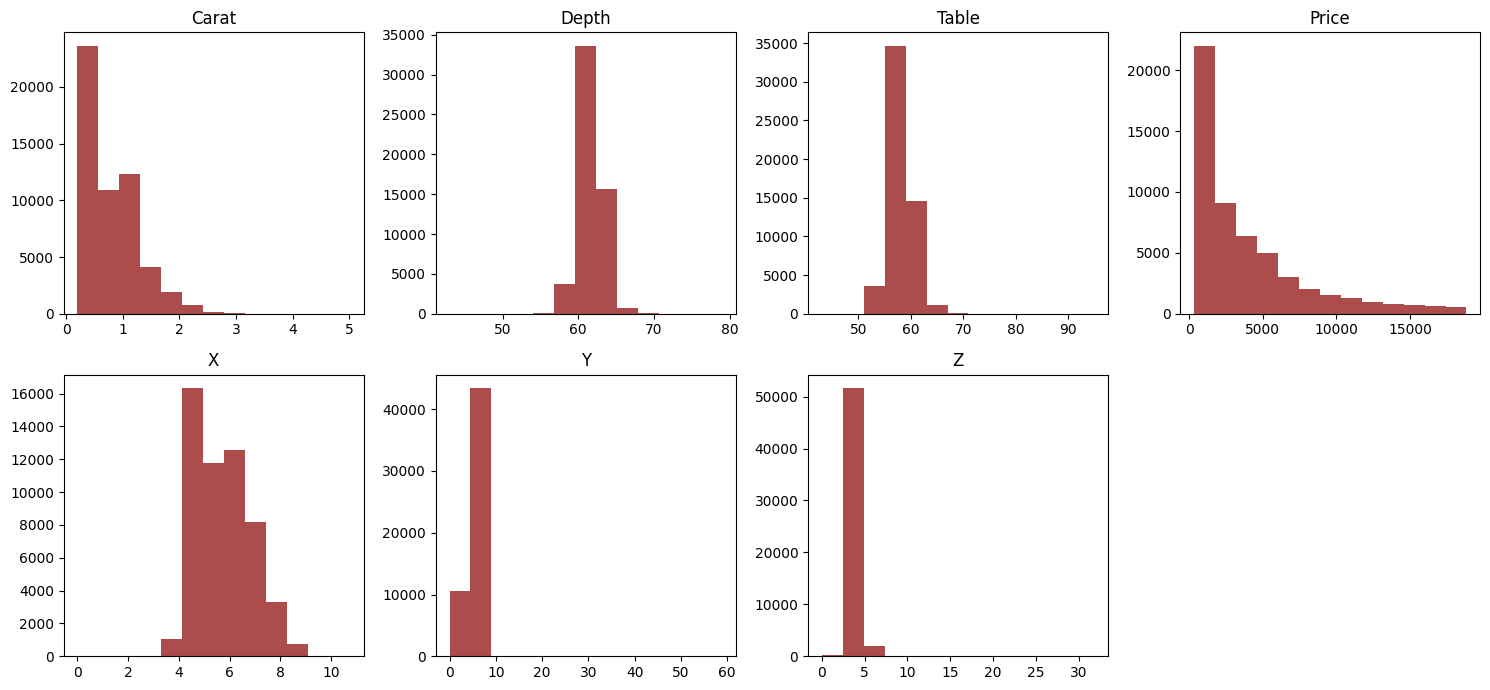

Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


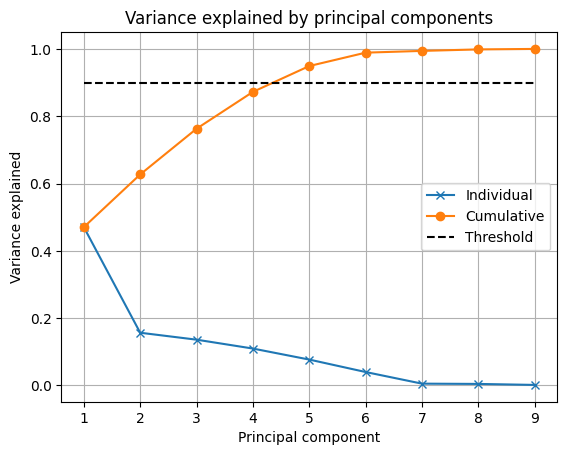

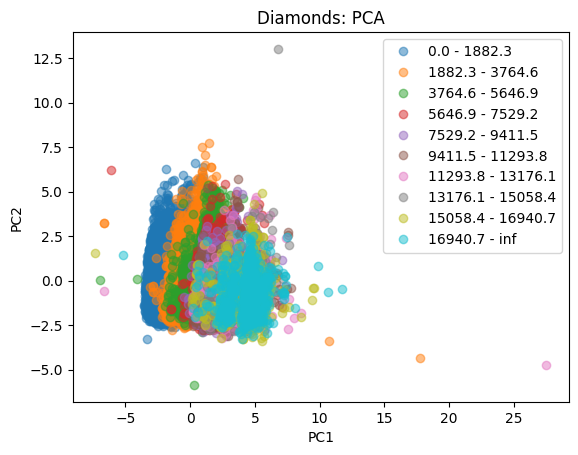

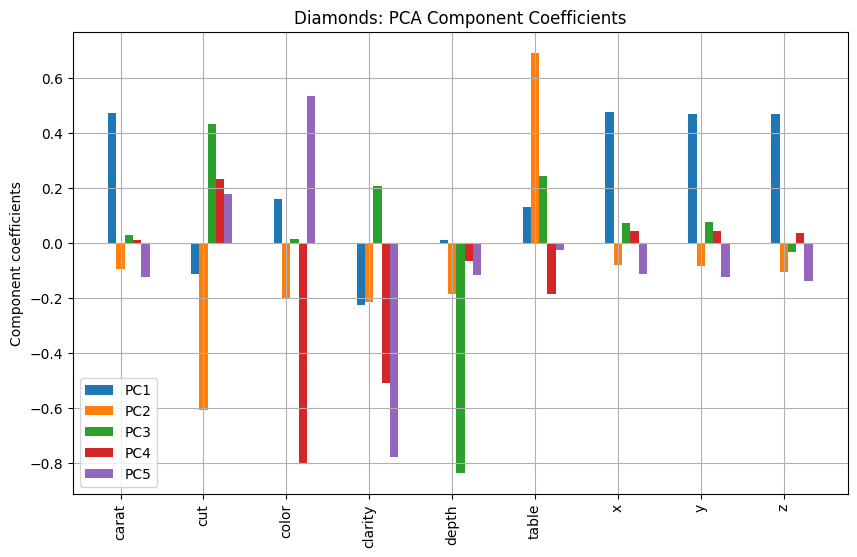

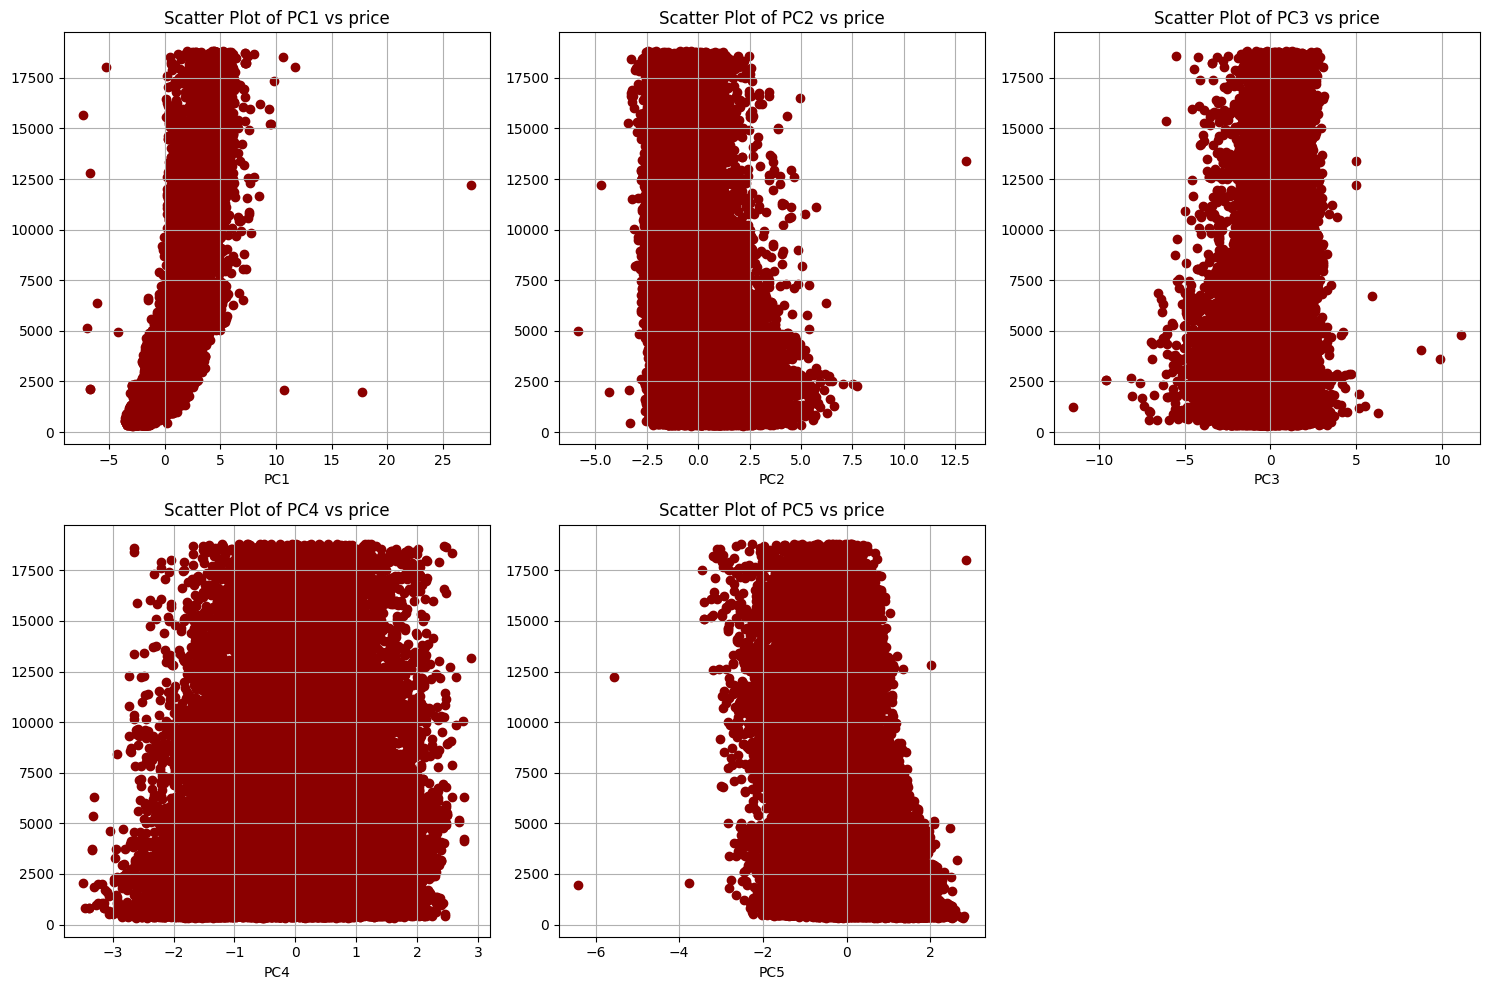

In [5]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Project 2
# REGRESSION PART A (1)

In [6]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum ([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [8]:
#REGRESSION PART A (1) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = train_error(model, X_train, y_train)
test_rmse = test_error(model, X_test, y_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)

Train RMSE: 1475190.868741403
Test RMSE: 1499636.6903304493
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073519


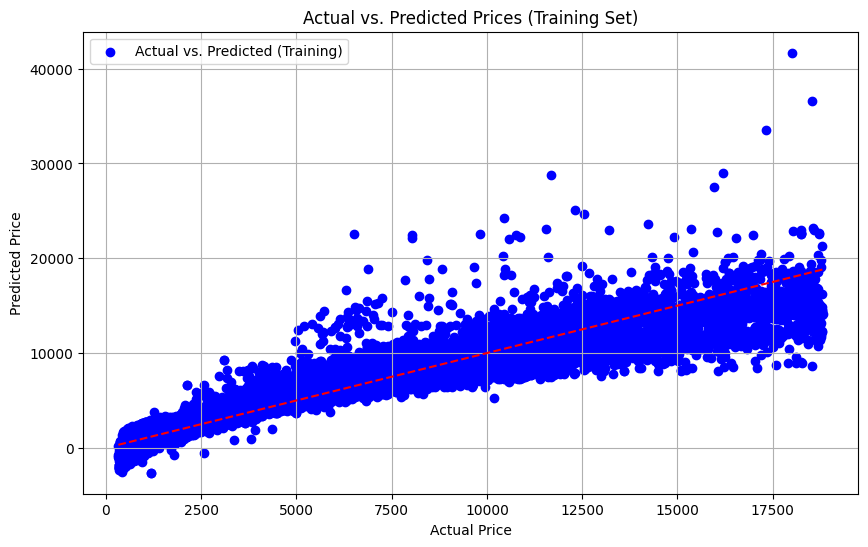

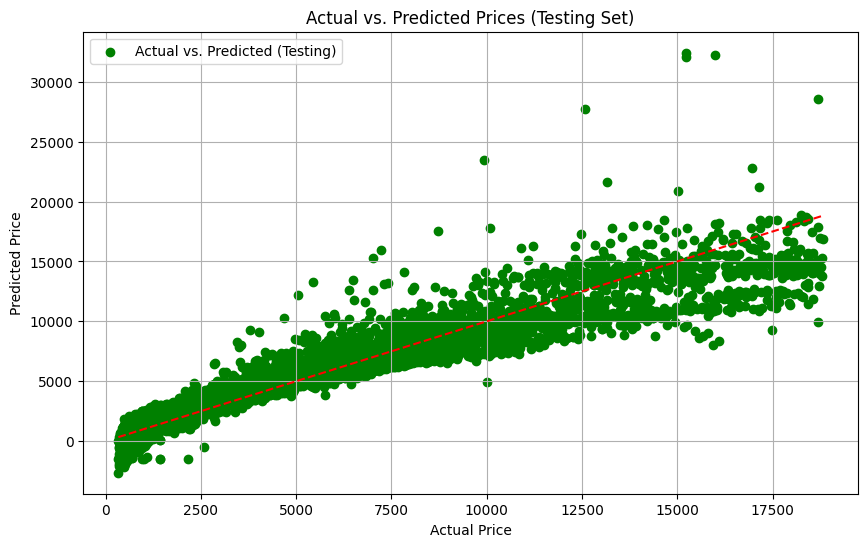

In [15]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [15]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

lambda_values = [0, 15, 30, 45, 60]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

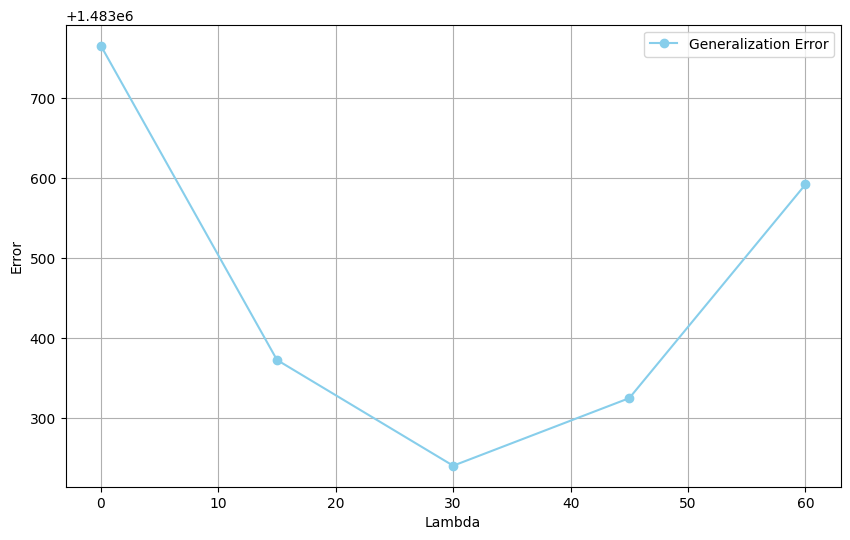

In [10]:
#plotting generalization error (and test error) as a function of lambda
#8.1.1

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
#plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART A (3)

# REGRESSION PART B (1)

First, define an artificial neural network

In [20]:
from sklearn.neural_network import MLPRegressor

def neural_network(h, X_train, y_train, X_test, y_test):
    ann_model = MLPRegressor(
            hidden_layer_sizes=(h,),
            max_iter=1000,  # Increase the number of iterations
            learning_rate_init=0.001,  # Adjust the learning rate
            solver='adam',  # Try different solvers
            early_stopping=True,  # Enable early stopping
            random_state=42
        )
    ann_model.fit(X_train, y_train)
    y_est = ann_model.predict(X_test)
    est_error = sum((y_est-y_test)**2)/len(y_est)

    return est_error

In [14]:
# Testing different h_values
from sklearn.model_selection import KFold 

h_values = [1, 3, 5, 10, 15, 30, 60]
df = pd.DataFrame(columns=['h', 'error'])

kf = KFold(n_splits=10, shuffle=True)
rows = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    for h in h_values:
        error = neural_network(h, X_train, y_train, X_test, y_test)
        rows.append({'h': h, 'error': error})

df = pd.DataFrame(rows)
            

C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alyon\anaconda3\envs\mlintro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alyon\a

In [20]:
#Printing results of mean errors of different amount of h units to choose optimal range
mean_errors = []
for h in h_values:
    filtered_rows = df[df['h'] == h]
    mean_error = filtered_rows['error'].mean()
    print(f'Mean error where h = {h}: {mean_error}')

Mean error where h = 1: 29785634.19869898
Mean error where h = 3: 1455222.0636909069
Mean error where h = 5: 1204864.8829694863
Mean error where h = 10: 982155.736068495
Mean error where h = 15: 934992.5681984939
Mean error where h = 30: 759173.8176840226
Mean error where h = 60: 731245.5823711553


Mean error where h = 1: 29785634.19869898

Mean error where h = 3: 1455222.0636909069

Mean error where h = 5: 1204864.8829694863

Mean error where h = 10: 982155.736068495

Mean error where h = 15: 934992.5681984939

Mean error where h = 30: 759173.8176840226

Mean error where h = 60: 731245.5823711553

In [1]:
#2-level cross validation for ann, ridge regression and baseline with k_outer=k_inner=10
rows = []
# Define the number of folds for both levels of cross-validation
K_outer = K_inner = 10

# Define the range of complexity-controlling parameters
h_values = [1, 5, 15, 30, 45, 60]
lambda_values = [0, 15, 30, 45, 60]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=42)

# Initialize lists to store the performance of each model
baseline_scores = []
ridge_scores = []
ann_scores = []
k = 1

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_outer_train = scaler.fit_transform(X_outer_train)

    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)

    # Initialize lists to store error value for each hyperparameter setting
    lambda_errors = {}
    for lmbda in lambda_values:
        lambda_errors[lmbda] = []

    ann_errors = {}
    for h in h_values:
        ann_errors[h] = []

    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_test_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_test = X_outer_train[inner_train_index], X_outer_train[inner_test_index]
        y_inner_train, y_inner_test = y_outer_train[inner_train_index], y_outer_train[inner_test_index]

        scaler = StandardScaler()
        X_inner_train = scaler.fit_transform(X_inner_train)

        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train, y_inner_train)
            ridge_error = test_error(ridge_model, X_inner_test, y_inner_test)
            lambda_errors[lmbda].append(ridge_error)

        # Train ANN models with different numbers of hidden units on the inner training set
        for h in h_values:
            # Adjusted ANN model with specified parameters
            ann_error = neural_network(h, X_inner_train, y_inner_train, X_inner_test, y_inner_test)
            ann_errors[h].append(ann_error)

    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(lambda_errors, key=lambda x: min(lambda_errors[x]))
    best_h = min(ann_errors, key=lambda x: min(ann_errors[x]))

    # Baseline
    baseline_model = LinearRegression()
    baseline_model.fit(X_outer_train, y_outer_train)
    baseline_error = test_error(baseline_model, X_outer_test, y_outer_test)

    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train, y_outer_train)
    ridge_error = test_error(ridge_model, X_outer_test, y_outer_test)

    # ANN with the best number of hidden units
    ann_error = neural_network(h, X_outer_train, y_outer_train, X_outer_test, y_outer_test)

    rows.append({'Fold': k, 'h': best_h, 'ann_error': ann_error, 'lambda': best_lambda, 'ridge_error': ridge_error,
                 'baseline_error': baseline_error})
    k += 1

two_fold_results = pd.DataFrame(rows)

NameError: name 'KFold' is not defined

In [3]:
#Importing data of two layer cross-validation manually, from running code in a cell below once

data = {
    'Fold': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'h': [60, 60, 45, 60, 45, 60, 30, 45, 30, 60],
    'ann_error': [697076.982860, 469310.407397, 585139.664856, 571401.843330, 714198.775569, 719216.434195, 819804.533293, 605027.788928, 865803.303355, 486064.588197],
    'lambda': [0, 0, 0, 0, 0, 60, 0, 0, 15, 0],
    'ridge_error': [1.553034e+06, 1.445009e+06, 1.329555e+06, 1.535460e+06, 1.499872e+06, 1.643070e+06, 1.478216e+06, 1.533252e+06, 1.349723e+06, 1.462513e+06],
    'baseline_error': [1.553034e+06, 1.445009e+06, 1.329555e+06, 1.535460e+06, 1.499872e+06, 1.651296e+06, 1.478216e+06, 1.533252e+06, 1.349848e+06, 1.462513e+06]
}

two_fold_results = pd.DataFrame(data)

print(two_fold_results)


   Fold   h      ann_error  lambda  ridge_error  baseline_error
0     1  60  697076.982860       0    1553034.0       1553034.0
1     2  60  469310.407397       0    1445009.0       1445009.0
2     3  45  585139.664856       0    1329555.0       1329555.0
3     4  60  571401.843330       0    1535460.0       1535460.0
4     5  45  714198.775569       0    1499872.0       1499872.0
5     6  60  719216.434195      60    1643070.0       1651296.0
6     7  30  819804.533293       0    1478216.0       1478216.0
7     8  45  605027.788928       0    1533252.0       1533252.0
8     9  30  865803.303355      15    1349723.0       1349848.0
9    10  60  486064.588197       0    1462513.0       1462513.0


In [35]:
#The best peroforming lambda = 0 in 8 out of 10 folds is suspicious, therefore we perform cross-validation for ringe again
#2-level cross validation for ann, ridge regression and baseline with k_outer=k_inner=10
rows = []
inner_rows = []

# Define the number of folds for both levels of cross-validation
K_outer = K_inner = 10

# Define the range of complexity-controlling parameters
lambda_values = [0, 15, 30, 45, 60]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=42)

# Initialize lists to store the performance of each model
baseline_scores = []
ridge_scores = []
k = 1

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
        

    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)

    # Initialize lists to store error value for each hyperparameter setting
    lambda_errors = {}
    for lmbda in lambda_values:
        lambda_errors[lmbda] = []

    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_test_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_test = X_outer_train[inner_train_index], X_outer_train[inner_test_index]
        y_inner_train, y_inner_test = y_outer_train[inner_train_index], y_outer_train[inner_test_index]

        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            model = Ridge(alpha=lmbda)
            model.fit(X_inner_train, y_inner_train)
            error = test_error(model, X_inner_test, y_inner_test)
            lambda_errors[lmbda].append(error)
            print('lambda:', lmbda, 'ridge_error:', error)

    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(lambda_errors, key=lambda x: min(lambda_errors[x]))
    print(f'best_lambda', )
    
    # Baseline
    baseline_model = LinearRegression()
    baseline_model.fit(X_outer_train, y_outer_train)
    baseline_error = test_error(baseline_model, X_outer_test, y_outer_test)

    # Regularized linear regression with the best λ value
    model = Ridge(alpha=best_lambda)
    model.fit(X_outer_train, y_outer_train)
    error = test_error(model, X_outer_test, y_outer_test)

    rows.append({'lambda': best_lambda, 'ridge_error': error,
                 'baseline_error': baseline_error})
    k += 1

lambda_fold_results = pd.DataFrame(rows)

lambda: 0 ridge_error: 1510758.2957741388
lambda: 15 ridge_error: 1509325.3501228741
lambda: 30 ridge_error: 1508140.416630815
lambda: 45 ridge_error: 1507182.5017985047
lambda: 60 ridge_error: 1506432.753088924
lambda: 0 ridge_error: 1447750.0797859894
lambda: 15 ridge_error: 1448514.8781419478
lambda: 30 ridge_error: 1449393.1038288914
lambda: 45 ridge_error: 1450373.9877978484
lambda: 60 ridge_error: 1451447.9119769582
lambda: 0 ridge_error: 1458908.8951496424
lambda: 15 ridge_error: 1460083.4012436818
lambda: 30 ridge_error: 1461381.472097344
lambda: 45 ridge_error: 1462791.1169614163
lambda: 60 ridge_error: 1464301.6168045232
lambda: 0 ridge_error: 1483157.9954439388
lambda: 15 ridge_error: 1483886.1978261054
lambda: 30 ridge_error: 1484789.4034975346
lambda: 45 ridge_error: 1485777.251327018
lambda: 60 ridge_error: 1486796.788659314
lambda: 0 ridge_error: 1405595.8987724327
lambda: 15 ridge_error: 1407324.01167637
lambda: 30 ridge_error: 1409138.6219533407
lambda: 45 ridge_error:

lambda: 45 ridge_error: 1548639.9029947596
lambda: 60 ridge_error: 1547823.7736062245
lambda: 0 ridge_error: 1455556.162199117
lambda: 15 ridge_error: 1453088.9498786835
lambda: 30 ridge_error: 1451663.8308726018
lambda: 45 ridge_error: 1451041.342289703
lambda: 60 ridge_error: 1451042.418940601
lambda: 0 ridge_error: 1339349.5430894413
lambda: 15 ridge_error: 1341517.583935624
lambda: 30 ridge_error: 1343766.7457123955
lambda: 45 ridge_error: 1346041.4269490356
lambda: 60 ridge_error: 1348310.746027386
lambda: 0 ridge_error: 1568103.243382496
lambda: 15 ridge_error: 1566217.2665283142
lambda: 30 ridge_error: 1564572.3759498755
lambda: 45 ridge_error: 1563148.8710938573
lambda: 60 ridge_error: 1561929.031209457
lambda: 0 ridge_error: 1439693.1547374104
lambda: 15 ridge_error: 1439502.2678021577
lambda: 30 ridge_error: 1439481.836612663
lambda: 45 ridge_error: 1439616.9837958938
lambda: 60 ridge_error: 1439894.3905481836
lambda: 0 ridge_error: 1481884.6269666285
lambda: 15 ridge_error: 

lambda: 0 ridge_error: 1422009.129972603
lambda: 15 ridge_error: 1415386.61057764
lambda: 30 ridge_error: 1410539.1478593873
lambda: 45 ridge_error: 1407059.125592102
lambda: 60 ridge_error: 1404642.9133260245
lambda: 0 ridge_error: 1367728.3048589837
lambda: 15 ridge_error: 1367580.1682843557
lambda: 30 ridge_error: 1367646.7415623276
lambda: 45 ridge_error: 1367907.7882042956
lambda: 60 ridge_error: 1368345.3137735478
lambda: 0 ridge_error: 1652565.3766236699
lambda: 15 ridge_error: 1650805.4591284809
lambda: 30 ridge_error: 1649259.5799238416
lambda: 45 ridge_error: 1647910.0611675442
lambda: 60 ridge_error: 1646741.0366395738
lambda: 0 ridge_error: 1449992.112410017
lambda: 15 ridge_error: 1450752.1335978315
lambda: 30 ridge_error: 1451637.1166326678
lambda: 45 ridge_error: 1452635.2404309586
lambda: 60 ridge_error: 1453735.9379488726
lambda: 0 ridge_error: 1572896.487296731
lambda: 15 ridge_error: 1572175.8139411812
lambda: 30 ridge_error: 1571805.2007054752
lambda: 45 ridge_error

In [37]:
print(lambda_errors)

{0: [1390080.0508138202, 1329148.1670553435, 1471355.924175178, 1371463.951575354, 1502328.7585595483, 1609112.2206223386, 1605188.36152036, 1493390.7747629092, 1486701.46570052, 1596553.7464867684], 15: [1392044.480870214, 1330150.7791046954, 1466935.2331663186, 1372581.9493463126, 1503791.3386079748, 1608117.0522983843, 1603602.2558474997, 1493305.9016448378, 1485434.644810245, 1597107.6400586565], 30: [1394007.3908062335, 1331268.5448501501, 1463719.4047506514, 1373819.3873527444, 1505339.7540337967, 1607391.8016988588, 1602218.3447953605, 1493400.182781609, 1484396.6137278206, 1597792.2249000608], 45: [1395922.3969405717, 1332490.1880958122, 1461447.1921654684, 1375164.5224776764, 1506965.0934334905, 1606913.073332671, 1601020.0121586202, 1493657.201576415, 1483566.7378240342, 1598595.7573314], 60: [1397769.391479538, 1333805.6562680965, 1459922.869609353, 1376606.8866405054, 1508659.4344884993, 1606659.8837145485, 1599992.3536977952, 1494062.3145241041, 1482926.781094268, 1599507.

# REGRESSION PART B (2)